# TP 01 : Linear Regression

Libraries importations

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

# Preprocissing Part : generate date (X , Y), Cleaning 

Loading boston data :

In [2]:
boston=load_boston()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

showing the content of boston dataset :

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

Keys names : 

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

show just the Target : 

In [5]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
# his shape : 
print("dimentions = (rows : {} , Columns : 1)".format(boston['target'].shape[0] ))

dimentions = (rows : 506 , Columns : 1)


Making dataFrame via boston dataset 

In [7]:
df_X = pd.DataFrame(boston.data , columns= boston.feature_names)
df_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


illustrate the 3 first lines , and 3 last lines from owr data Frame : (our features)

In [8]:
df_X.head(3) # 3 first lines

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [9]:
df_X.tail(3) # 3 last lines

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


Generate our target (variable cible y)

In [10]:
df_Y=pd.DataFrame(boston.target)

In [11]:
df_Y.head(5)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# Machine Learning Part : make model , fit model, and prediction

In [12]:
# importation 
from sklearn.linear_model import LinearRegression

create model

In [13]:

model = LinearRegression()

In [14]:
model

LinearRegression()

### devising our dataset on two part : 
###### first part (x_train , y_train) for fitting our model
###### second part (x_test , y_test) to making predictions and evaluating our model (Testing our model performation )

In [15]:
x_train , x_test , y_train , y_test = train_test_split(df_X , df_Y , test_size=0.2 )

sizes : 

In [16]:
print("Training Set Dimentional : (X_train) : " , x_train.shape)
print("Training Set Dimentional : (Y_train) : " , y_train.shape)
print("Test Set size : (X_test) : " , x_test.shape)
print("Test Set size : (Y_test) : " , y_test.shape)

Training Set Dimentional : (X_train) :  (404, 13)
Training Set Dimentional : (Y_train) :  (404, 1)
Test Set size : (X_test) :  (102, 13)
Test Set size : (Y_test) :  (102, 1)


the Fit of model (training)

In [17]:
model.fit(x_train , y_train)

LinearRegression()

make predictions (predect the houses prices)

In [18]:
preditions = model.predict(x_test)

In [19]:
print(preditions)

[[19.98533187]
 [21.00156543]
 [23.35800118]
 [32.43236873]
 [25.23270813]
 [35.98361345]
 [35.52939819]
 [23.15990337]
 [14.37156064]
 [20.09929603]
 [16.91340503]
 [ 6.59639214]
 [28.07386589]
 [17.14177557]
 [27.75944201]
 [22.68209162]
 [22.45984819]
 [39.62267573]
 [25.67740439]
 [25.51255039]
 [24.58341349]
 [34.84999938]
 [32.94301242]
 [35.62467565]
 [22.72888078]
 [15.08425692]
 [16.74805291]
 [26.28353158]
 [21.7071437 ]
 [30.35100244]
 [13.06675456]
 [22.71744119]
 [35.37275393]
 [25.04025907]
 [19.59706525]
 [17.81496035]
 [ 5.79528331]
 [14.49409718]
 [25.58211466]
 [35.67031282]
 [15.84709288]
 [25.05035568]
 [20.64327815]
 [20.56447552]
 [15.82667187]
 [29.07343315]
 [32.74565264]
 [24.60493547]
 [19.06653253]
 [40.31579695]
 [ 7.84256299]
 [ 9.06348828]
 [17.4577475 ]
 [23.99479458]
 [18.6884204 ]
 [21.25053175]
 [ 5.77488002]
 [21.95497574]
 [38.96686752]
 [17.21002858]
 [22.76228885]
 [25.02695744]
 [37.40371219]
 [15.79665577]
 [43.01297283]
 [23.85269537]
 [28.43071

In [20]:
y_test

,0
393,13.8
152,15.3
332,19.4
222,27.5
325,24.6
...,...
81,23.9
462,19.5
69,20.9
384,8.8


### Mean Square Error : It presents sum of error between reels values of houses prince and their predictions values

In [21]:
MSE = np.mean((y_test - preditions)**2)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [22]:
MSE

0    18.097166
dtype: float64

In [23]:
 mean_squared_error(y_test,preditions)

18.09716638517809

# Applied the Linear regression in Dataset CSV : 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
dataset = pd.read_csv('valeurs_trimestrielles.csv',sep=';' )
dataset.head(6)

,Periode,Indice
0,67,129.72
1,68,129.38
2,66,129.03
3,66,128.45
4,65,127.77
5,64,127.22


In [26]:
x = dataset.iloc[:,:-1].values 
y = dataset.iloc[:, -1].values
x.shape , y.shape

((67, 1), (67,))

In [27]:
# from sklearn.model_selection import train_test_split
x_tr , x_test , y_tr , y_test = train_test_split(x , y , train_size=0.7)

In [28]:
# fiting model : 
md = linear_model.LinearRegression().fit(x_tr , y_tr)

In [29]:
predt = md.predict(x_test)

In [30]:
predt

array([124.48093906, 125.93314143, 108.50671302, 130.65279912,
       115.04162367, 110.68501657, 128.83754616, 121.93958492,
       109.5958648 , 118.67212959, 114.31552249, 116.85687663,
       116.49382604, 122.6656861 , 127.74839439, 113.22637071,
       114.67857308, 129.20059676, 122.30263551, 126.29619202,
       124.11788847])

Plotting our points (x , y )

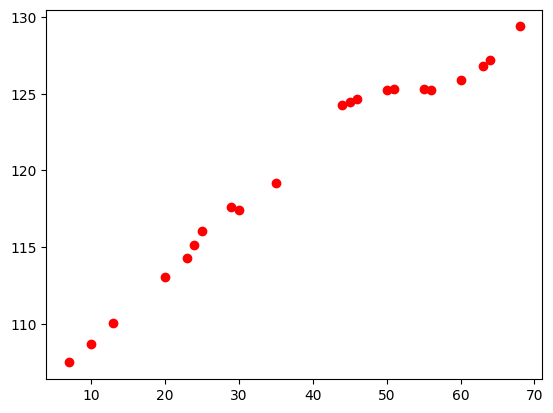

In [31]:
plt.scatter(x_test, y_test, color = 'red')

Plot x , predictions

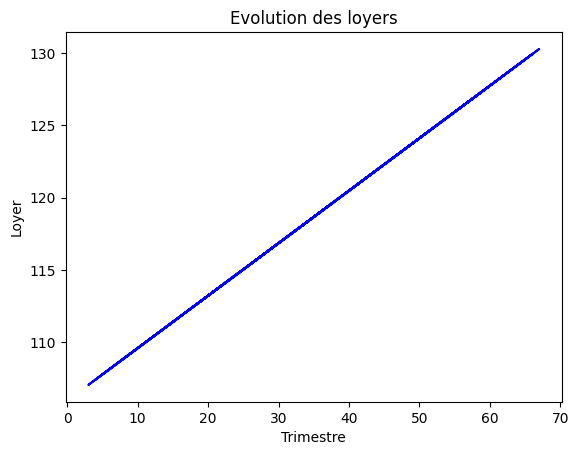

In [32]:
plt.plot(x_tr, md.predict(x_tr), color = 'blue') 
plt.title('Evolution des loyers')
plt.xlabel('Trimestre')
plt.ylabel('Loyer')
plt.show()

Visualisation our model 

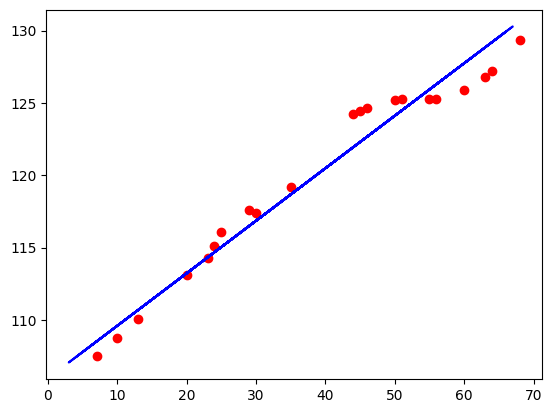

In [33]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_tr, md.predict(x_tr), color = 'blue') 

# Evaluation : accuracy , f score 

In [34]:
from sklearn.metrics  import mean_squared_error
print('Mean Square Error  =  ' , mean_squared_error(y_test , predt))

Mean Square Error  =   1.6917564456447338


# Fin.